In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from datetime import datetime
import os

In [2]:
cd /content/drive/MyDrive/comma_ai_dev/Probono-AI-Model/population_data

/content/drive/MyDrive/comma_ai_dev/Probono-AI-Model/population_data


In [3]:
import os
path = os.listdir('/content/drive/MyDrive/comma_ai_dev/Probono-AI-Model/population_data')
file_list = [file for file in path if file.endswith('.csv')] # 파일명이 .csv로 끝나는 파일들 병합
file_list.sort()

In [4]:
df = pd.DataFrame()
for i in file_list:
    data = pd.read_csv(i)
    df = pd.concat([df,data])  #읽어온 파일들을 하나의 df에 통합
    print(i)

LOCAL_PEOPLE_DONG_202209.csv
LOCAL_PEOPLE_DONG_202210.csv
LOCAL_PEOPLE_DONG_202211.csv
LOCAL_PEOPLE_DONG_202212.csv
LOCAL_PEOPLE_DONG_202301.csv
LOCAL_PEOPLE_DONG_202302.csv
LOCAL_PEOPLE_DONG_202303.csv
LOCAL_PEOPLE_DONG_202304.csv
LOCAL_PEOPLE_DONG_202305.csv
LOCAL_PEOPLE_DONG_202306.csv
LOCAL_PEOPLE_DONG_202307.csv
LOCAL_PEOPLE_DONG_202308.csv


In [5]:
#2023 1/4분기 65세이상고령자 많은 지역 4곳
#출처: 서울 열린데이터 광장

#강서구 화곡1동  11500540
#은평구 역촌동   11380625
#은평구 진관동   11380690
#강동구 길동     11740685

dong_codes = [11500540, 11380625, 11380690, 11740685]  #화곡 1동, 역촌동, 진관동, 길동
dong_data = {}

for code in dong_codes:
    df_dong = df.loc[df['행정동코드'] == code].copy()

    # 'Datetime' 열 생성 및 인덱스로 설정
    df_dong['Datetime'] = pd.to_datetime(df_dong['기준일ID'].astype(str) + df_dong['시간대구분'].astype(str).str.zfill(2), format='%Y%m%d%H')
    df_dong.set_index('Datetime', inplace=True)

    df_dong.drop(['기준일ID', '시간대구분', '행정동코드'], axis=1, inplace=True)  #불필요한 열 삭제
    df_dong.rename(columns={'총생활인구수': 'population'}, inplace=True)  #'총생활인구수' 열 이름 변경
    df_dong.index.freq = 'H'  #인덱스 주기를 시간 단위('H')로 설정

    dong_data[code] = df_dong  #딕셔너리에 데이터프레임 저장

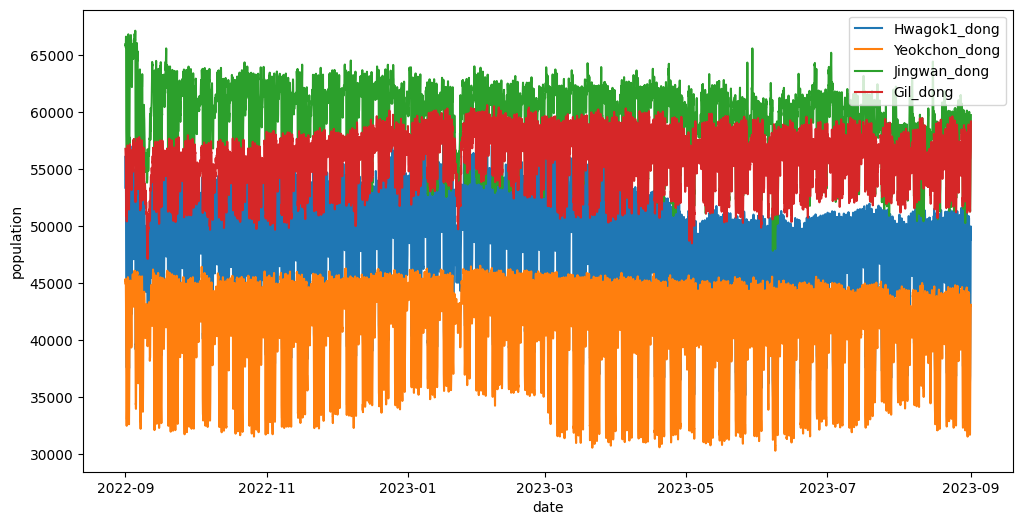

In [6]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.figure(figsize=(12, 6))

# 동 코드와 레이블 매핑
dong_codes = {
    11500540: 'Hwagok1_dong',
    11380625: 'Yeokchon_dong',
    11380690: 'Jingwan_dong',
    11740685: 'Gil_dong'
}

for code, label in dong_codes.items():
    plt.plot(dong_data[code]['population'], label=label)

plt.xlabel('date')
plt.ylabel('population')
plt.legend()  # 범례 표시
plt.show()

<Axes: xlabel='Datetime'>

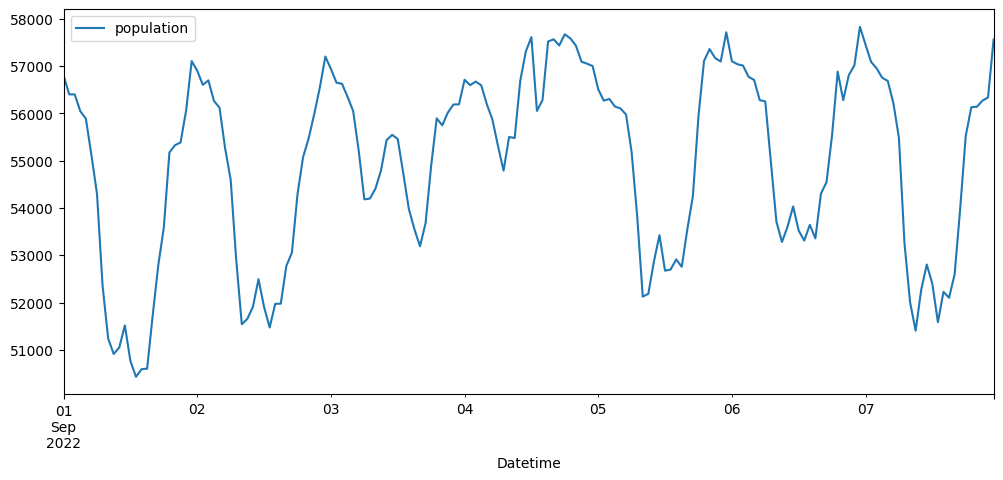

In [15]:
dong_data[11740685].iloc[:168].plot(figsize=(12,5))

In [10]:
#dong_codes = [11500540, 11380625, 11380690, 11740685]  #화곡 1동, 역촌동, 진관동, 길동

dong_data[11500540].to_csv('Hwagok1_pop_data.csv', index=True)  #화곡 1동 인구 데이터
dong_data[11380625].to_csv('Yeokchon_pop_data.csv', index=True) #역촌동 인구 데이터
dong_data[11380690].to_csv('Jingwan_pop_doata.csv', index=True) #진광동 인구 데이터
dong_data[11740685].to_csv('Gil_pop_data.csv', index=True)  #길동 인구 데이터